In [189]:
import numpy as np
import h5py
import pandas as pd
import sys
import illustris_python.illustris_python as il
import matplotlib.pyplot as plt

sim_dir = 'LH_0'
snapshot = 33

basePath = '/home/jovyan/Data/Sims/IllustrisTNG/{}/'.format(sim_dir)
header = il.groupcat.loadHeader(basePath, snapshot)

little_h = 0.6774
scaling_factor = header['Time']
print(scaling_factor)
boxsize = header['BoxSize'] * scaling_factor / little_h

0.9999999999999998


In [190]:
GroupFirstSub = il.groupcat.loadHalos(basePath, snapshot, fields=['GroupFirstSub'])

fields = ['SubhaloMassType','SubhaloSFRinRad', 'SubhaloPos', 
          'SubhaloHalfmassRadType', 'SubhaloSpin', 'SubhaloLenType']
subhalos = il.groupcat.loadSubhalos(basePath, snapshot, fields=fields)

subhalos['SubhaloMassStar'] = subhalos['SubhaloMassType'][:, 4] 
subhalos['SubhaloMassGas'] = subhalos['SubhaloMassType'][:, 0] * 1e10 / little_h
subhalos['SubhaloMassBH'] = subhalos['SubhaloMassType'][:, 5] * 1e10 / little_h
subhalos['SubhaloMassDM'] = subhalos['SubhaloMassType'][:, 1] * 1e10 / little_h
subhalos['SubhaloSpin_x'] = subhalos['SubhaloSpin'][:, 0] / little_h
subhalos['SubhaloSpin_y'] = subhalos['SubhaloSpin'][:, 1] / little_h
subhalos['SubhaloSpin_z'] = subhalos['SubhaloSpin'][:, 2] / little_h
subhalos['SubhaloPos_x'] = subhalos['SubhaloPos'][:, 0] * scaling_factor / little_h
subhalos['SubhaloPos_y'] = subhalos['SubhaloPos'][:, 1] * scaling_factor / little_h
subhalos['SubhaloPos_z'] = subhalos['SubhaloPos'][:, 2] * scaling_factor / little_h
subhalos['SubhaloStarsLen'] = subhalos['SubhaloLenType'][:, 4]
subhalos['SubhaloGasLen'] = subhalos['SubhaloLenType'][:, 0]

subhalos['SubhaloHalfmassRadStar'] = subhalos['SubhaloHalfmassRadType'][:, 4] * scaling_factor / little_h

del subhalos['SubhaloSpin']
del subhalos['SubhaloMassType']
del subhalos['SubhaloHalfmassRadType']
del subhalos['SubhaloPos']
del subhalos['SubhaloLenType']
del subhalos['count']

tng_df = pd.DataFrame(subhalos)
tng_df['GalaxyID'] = tng_df.index
tng_df['Central'] = tng_df['GalaxyID'].isin(GroupFirstSub)
tng_df = tng_df[tng_df.SubhaloMassStar > 0]
#tng_df = tng_df[tng_df.SubhaloHalfmassRadStar > 0]
tng_df

,SubhaloSFRinRad,SubhaloMassStar,SubhaloMassGas,SubhaloMassBH,SubhaloMassDM,SubhaloSpin_x,SubhaloSpin_y,SubhaloSpin_z,SubhaloPos_x,SubhaloPos_y,SubhaloPos_z,SubhaloStarsLen,SubhaloGasLen,SubhaloHalfmassRadStar,GalaxyID,Central
0,8.062304,54.203453,1.370335e+13,7.380481e+09,8.023650e+13,10616.217773,-1808.491577,863.671143,898.724731,25693.892578,13241.527344,59813,687132,31.425772,0,True
1,2.637218,2.636133,1.533063e+11,7.313286e+07,1.259809e+12,233.607742,2728.307129,312.227600,1553.000366,25749.675781,15022.629883,2885,7413,7.561204,1,False
2,0.000000,2.106634,1.357539e+09,1.708524e+08,4.854502e+11,-169.656387,-88.593674,-3.353223,533.932129,26270.322266,14005.518555,2297,60,5.880777,2,False
3,0.129159,0.119772,5.579677e+10,6.109788e+07,3.770102e+11,1621.214844,1074.970337,-524.449707,265.810150,25900.175781,12640.291016,122,2490,11.093488,3,False
4,0.260545,0.902091,9.537335e+09,4.808125e+07,2.455527e+11,-154.443069,67.550926,-25.294554,1720.858765,25245.035156,13509.083984,936,419,8.783434,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9579,0.000000,0.000992,2.454144e+07,0.000000e+00,5.952792e+09,-26.886194,-47.151867,30.740057,2024.770386,27291.796875,7397.706055,1,2,0.000000,9579,True
9906,0.000000,0.027137,0.000000e+00,0.000000e+00,0.000000e+00,4.226079,7.427909,15.815586,367.976593,26437.792969,14225.005859,33,0,1.411704,9906,True
9966,0.000000,0.000632,0.000000e+00,0.000000e+00,6.052005e+09,-16.437822,35.450100,43.169357,28631.472656,197.986282,8373.371094,1,0,0.000000,9966,True
9972,0.000000,0.000814,0.000000e+00,0.000000e+00,5.555940e+09,45.759830,-0.909685,11.673085,36068.929688,5368.106934,16916.371094,1,0,0.000000,9972,True


In [191]:
tng_df = tng_df[tng_df.SubhaloStarsLen > 1000]
tng_df = tng_df.reset_index()
tng_df

,index,SubhaloSFRinRad,SubhaloMassStar,SubhaloMassGas,SubhaloMassBH,SubhaloMassDM,SubhaloSpin_x,SubhaloSpin_y,SubhaloSpin_z,SubhaloPos_x,SubhaloPos_y,SubhaloPos_z,SubhaloStarsLen,SubhaloGasLen,SubhaloHalfmassRadStar,GalaxyID,Central
0,0,8.062304,54.203453,1.370335e+13,7.380481e+09,8.023650e+13,10616.217773,-1808.491577,863.671143,898.724731,25693.892578,13241.527344,59813,687132,31.425772,0,True
1,1,2.637218,2.636133,1.533063e+11,7.313286e+07,1.259809e+12,233.607742,2728.307129,312.227600,1553.000366,25749.675781,15022.629883,2885,7413,7.561204,1,False
2,2,0.000000,2.106634,1.357539e+09,1.708524e+08,4.854502e+11,-169.656387,-88.593674,-3.353223,533.932129,26270.322266,14005.518555,2297,60,5.880777,2,False
3,5,0.000000,1.091192,0.000000e+00,0.000000e+00,1.817586e+11,-144.744431,-4.412198,-18.320105,220.415054,25769.667969,12781.275391,1183,0,11.054872,5,False
4,290,0.141855,29.782135,1.184660e+13,3.136311e+09,6.587657e+13,-20598.080078,-43501.699219,64815.804688,23520.519531,20571.037109,3281.343994,32928,603924,20.306379,290,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2381,1.022259,1.310572,7.674841e+10,2.064852e+07,7.559054e+11,365.376740,619.440674,556.317261,1816.626343,31977.703125,1293.195190,1410,3746,7.197531,2381,True
106,2383,1.288692,0.974664,8.187028e+10,5.630668e+07,7.152280e+11,238.814011,-607.771179,-449.899658,28072.599609,870.088806,8047.425293,1032,4126,6.041333,2383,True
107,2388,3.760153,1.247293,8.533352e+10,5.670254e+07,6.937979e+11,400.102356,-787.158081,-540.075562,17978.974609,18166.609375,17971.626953,1351,4214,4.227895,2388,True
108,2401,0.490171,1.139620,8.067589e+10,2.311110e+07,6.919129e+11,-955.461060,136.536865,-381.560059,18790.492188,4516.145996,34882.234375,1244,4012,5.284581,2401,True


In [206]:
subhalo_id = 0
print(tng_df.iloc[subhalo_id]['GalaxyID'])
stars = il.snapshot.loadSubhalo(basePath, snapshot, tng_df.iloc[subhalo_id]['GalaxyID'],
                        'stars', fields=["ParticleIDs", "GFM_StellarFormationTime", "Masses", "Coordinates", "Velocities"])

stars

mass = stars['Masses'] * 1e10 / little_h

vel = stars["Velocities"] * np.sqrt(scaling_factor)

vel = vel[:, 2]
coords = stars['Coordinates'] * scaling_factor / little_h

GroupFirstSub = il.groupcat.loadHalos(basePath, 33, fields=['GroupFirstSub'])
fields = ['SubhaloMassType','SubhaloSFRinRad', 'SubhaloPos', 
          'SubhaloHalfmassRadType', 'SubhaloSpin', 'SubhaloLenType']
subhalos = il.groupcat.loadSubhalos(basePath, 33, fields=fields)

centre = subhalos['SubhaloPos'][subhalo_id] * scaling_factor / little_h
coords = np.mod(coords - centre + 0.5 * boxsize, boxsize) + centre - 0.5 * boxsize
centre
hmsr_kpc = subhalos['SubhaloHalfmassRadType'][subhalo_id, 4] * scaling_factor / little_h


coords -= centre

coords = coords[:, (0, 1)]   

0
------------- /home/jovyan/home/Offsets/IllustrisTNG/LH_0/offsets_033.hdf5
-------------- /home/jovyan/home/Offsets/IllustrisTNG/LH_0/offsets_033.hdf5


In [207]:
stars

{'count': 59813,
 'ParticleIDs': array([41338112, 41229074, 40465044, ..., 88096161, 66621721, 60462992],
       dtype=uint32),
 'GFM_StellarFormationTime': array([ 0.21479674,  0.21408232,  0.2070904 , ..., -0.24475785,
         0.49361062,  0.3952975 ], dtype=float32),
 'Masses': array([0.00095063, 0.00098619, 0.00083589, ..., 0.0015584 , 0.0011911 ,
        0.00105338], dtype=float32),
 'Coordinates': array([[  608.88348466, 17405.44862332,  8969.76602867],
        [  608.38822265, 17405.15401953,  8969.57385207],
        [  608.42834183, 17405.38252318,  8970.1691864 ],
        ...,
        [ 1055.52244117, 17443.77359227, 10175.74394556],
        [24948.64394182, 17359.66283484,  8573.62766736],
        [24965.32321092, 17356.44416298,  8514.67662768]]),
 'Velocities': array([[  16.227911,  -71.71692 ,   88.94764 ],
        [ -68.89043 ,  -84.31791 ,   31.921133],
        [  49.148827,  -82.26042 ,   76.6452  ],
        ...,
        [ 485.37634 ,  -84.59081 , -371.4578  ],
       

In [208]:
def calc_percentiles(cnts_dict, percentiles_to_calc=range(101)):
    """Returns [(percentile, value)] with nearest rank percentiles.
    Percentile 0: <min_value>, 100: <max_value>.
    cnts_dict: { <value>: <count> }
    percentiles_to_calc: iterable for percentiles to calculate; 0 <= ~ <= 100
    """
    assert all(0 <= p <= 100 for p in percentiles_to_calc)
    percentiles = []
    num = sum(cnts_dict.values())
    cnts = sorted(cnts_dict.items())
    curr_cnts_pos = 0  # current position in cnts
    curr_pos = cnts[0][1]  # sum of freqs up to current_cnts_pos
    for p in sorted(percentiles_to_calc):
        if p < 100:
            percentile_pos = p / 100.0 * num
            while curr_pos <= percentile_pos and curr_cnts_pos < len(cnts):
                curr_cnts_pos += 1
                curr_pos += cnts[curr_cnts_pos][1]
            percentiles.append((p, cnts[curr_cnts_pos][0]))
        else:
            percentiles.append((p, cnts[-1][0]))  # we could add a small value
    return percentiles

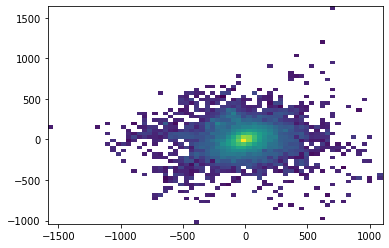

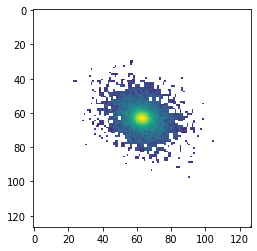

In [210]:
import matplotlib as mpl
from scipy import stats
from collections import Counter

plt.hist2d(coords[:, 0], coords[:, 1], norm=mpl.colors.LogNorm(), bins=64, weights=mass);
plt.show()


def binned_mapping(plane_xy, values, statistic='sum'):
    stamp_side_pix = 128  # pixels of map per side
    stamp_rel_side = 4  # n_times the half stellar mass radius (hmsr) of the galaxy

    bins = np.linspace(- hmsr_kpc * stamp_rel_side / 2,
                       hmsr_kpc * stamp_rel_side / 2, stamp_side_pix)

    hist = np.histogram2d(plane_xy[:, 1], plane_xy[:, 0], bins=[bins, bins])

    mmap, _, _, _ = stats.binned_statistic_2d(plane_xy[:, 1], plane_xy[:, 0], values,
                                              statistic=statistic,
                                              bins=[bins, bins])

    a = Counter(hist[0].flat)
    percentiles = calc_percentiles(a)

    lim = max(percentiles[75][1], 2)
    mmap[np.where(hist[0] <= lim)] = np.nan
    #plt.imshow(np.log10(mmap))
    #plt.show()
    #coords, centre
    return mmap


mmap = binned_mapping(coords, mass, statistic='sum')
plt.imshow(np.log10(mmap))
plt.show()